# Optimización de Conversión: Auditoría Forense y Análisis del Test A/B "Recommender System"

## **Introducción**
## Este proyecto aborda una situación importante: la continuación y validación de una prueba A/B abandonada. Nuestro rol como analista será actuar como un auditor de datos, evaluando si el nuevo sistema de recomendaciones fue efectivo, y también si el experimento en si mismo cumple con los estándares estadísticos necesarios para tomar una decisión informada.

## Objetivos:

 * ### **Validación de la Integridad del Experimento:** Verificar que el diseño técnico se haya respetado y que no existan sesgos por superposición de usuarios o eventos externos.

 * ### **Análisis de Comportamiento del Usuario EDA:** Identificar los patrones de navegación y distribución de los eventos para entender cómo interactúan los usuarios con el embudo de ventas.

 * ### **Evaluación de la Eficacia del Sistema de Recomendación:** Determinar si el nuevo sistema generó un aumento real del 10% en la conversión de las etapas críticas: Product Page, Cart y Purchase.

 * ### **Confirmación Estadística:** Aplicar pruebas de hipótesis Z-Test para asegurar que las diferencias observadas entre el grupo de control A y el experimental B son estadísticamente significativas y no por azar.

## Paso 1: Exploración de datos y EDA

In [1]:
# Importamos las librerías necesarias y cargamos los archivos csv en Dataframes.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math # Para algunas funciones matemáticas básicas.
from scipy import stats # Para realizar pruebas estadísticas.

marketing_events = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/proyectofinal_pruebaab/ab_project_marketing_events_us.csv')
new_users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/proyectofinal_pruebaab/final_ab_new_users_upd_us.csv')
events = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/proyectofinal_pruebaab/final_ab_events_upd_us.csv')
participants = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/proyectofinal_pruebaab/final_ab_participants_upd_us.csv')

print('Datos cargados exitósamente.\n')

# Definimos una funcion para revisar los datos de cada tabla.

def revisar_datos(df, name):
  print(f"{name} tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n")
  print(f"\nLa informacion general de {name} es: \n")
  print(df.info())
  print(f"\n Las primeras 5 filas de {name} son: \n")
  display(df.head())
  print(f"\n 5 filas aleatorias de {name} son: \n")
  display(df.sample(5))
  print("\n" + "="*50 + "\n")

# Ejecutamos la función para revisar las 4 tablas

revisar_datos(marketing_events, "Calendario de Marketing ")
revisar_datos(new_users, "Nuevos Usuarios")
revisar_datos(events, "Log de Actividad")
revisar_datos(participants, "Participantes del Test")




Datos cargados exitósamente.

Calendario de Marketing  tiene 14 filas y 4 columnas.


La informacion general de Calendario de Marketing  es: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes
None

 Las primeras 5 filas de Calendario de Marketing  son: 



,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11



 5 filas aleatorias de Calendario de Marketing  son: 



,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19




Nuevos Usuarios tiene 58703 filas y 4 columnas.


La informacion general de Nuevos Usuarios es: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB
None

 Las primeras 5 filas de Nuevos Usuarios son: 



,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone



 5 filas aleatorias de Nuevos Usuarios son: 



,user_id,first_date,region,device
19275,2C05B06CE6BFEC7C,2020-12-08,EU,iPhone
46245,909F4EF02267D6A3,2020-12-12,EU,PC
6671,6F45B61FBF00F1B3,2020-12-14,EU,Android
20064,B4A3888E59F2F11F,2020-12-15,EU,Android
40148,A76F046D8D47589E,2020-12-18,EU,Mac




Log de Actividad tiene 423761 filas y 4 columnas.


La informacion general de Log de Actividad es: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB
None

 Las primeras 5 filas de Log de Actividad son: 



,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99



 5 filas aleatorias de Log de Actividad son: 



,user_id,event_dt,event_name,details
260554,95FABD1FBE569A8E,2020-12-10 11:38:47,login,NaN
122507,495238BE006146F9,2020-12-07 13:35:18,product_page,NaN
260689,138E79AE8ECFC50B,2020-12-10 00:39:41,login,NaN
183816,F8C4024D40DB63DA,2020-12-19 13:41:15,product_page,NaN
375779,DFCF8186E6AD964E,2020-12-22 22:09:32,login,NaN




Participantes del Test tiene 14525 filas y 3 columnas.


La informacion general de Participantes del Test es: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB
None

 Las primeras 5 filas de Participantes del Test son: 



,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test



 5 filas aleatorias de Participantes del Test son: 



,user_id,group,ab_test
11739,373F4EDC275F9FBA,B,interface_eu_test
12639,669F197DC7EB4FD9,B,interface_eu_test
13748,AD6EFE66D6124CF1,B,interface_eu_test
1106,D0562837FBB58AC5,A,recommender_system_test
8361,456A77B6939493FC,B,interface_eu_test


### Observaciones:
#### Se aprecian varios puntos importantes. Las columnas relacionadas con fechas start_dt, finish_dt en marketing_events, first_date en new_users, y event_dt en events están actualmente clasificadas como strings. Para facilitar cualquier análisis y asegurar la correcta manipulación de rangos de fechas, debemos convertirlas tipo de dato datetime.

#### Podemos observar que en la tabla events hay ausentes en la columna details; esto no necesariamente indica que falta información si no que no hubo una transacción. Esta columna guarda el monto de la compra en USD. Si el evento es view_product, el monto "vacío" y si el evento es purchase, el monto tiene un número. Entonces no debemos borrar esas filas, solamente entender que NaN ahí significa que "no hubo transacción monetaria" o "compra".

## Corrección de fechas y verificación de dulplicados.


In [2]:
# Convertiremos los tipos de datos de las columnas que contienen fechas de String - datetime.

# Corrección para marketing_events, events y new_users
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] =pd.to_datetime(marketing_events['finish_dt'])
events['event_dt'] = pd.to_datetime(events['event_dt'])
new_users['first_date'] = pd.to_datetime(new_users['first_date'])

print('---------- Fechas corregidas exitósamente----------')

# Verificamos los duplicados si existen
print('\n---------- Conteo de duplicados ----------')
print("Duplicados en events: ", events.duplicated().sum())
print('Duplicados en new_users: ', new_users.duplicated().sum())
print('Duplicados en participants: ', participants.duplicated().sum())
print('Duplicados en marketing_events: ', marketing_events.duplicated().sum())

print('\n---------- Verificación de nulos en events----------')

# Primero veremos cuantos datos tienen details 'vacio'
null_check = events[events['details'].isnull()]['event_name'].unique()

print(f'Los de eventos nulos o vacios en events son: {null_check}')

# Ahora vemos cuantos datos tienen details 'Lleno'
full_check = events[events['details'].notnull()]['event_name'].unique()
print(f'Los eventos llenos en events son: {full_check} ')

# Verificaremos si alguna compra o 'purchase' esta vacia o sin precio por cuestiones de calidad.
purchase_vacia = events[(events['event_name'] == 'purchase') & (events['details'].isnull())]
print(f'La cantidad de compras vacias o sin precio en events es: {len(purchase_vacia)}')




---------- Fechas corregidas exitósamente----------

---------- Conteo de duplicados ----------
Duplicados en events:  0
Duplicados en new_users:  0
Duplicados en participants:  0
Duplicados en marketing_events:  0

---------- Verificación de nulos en events----------
Los de eventos nulos o vacios en events son: ['product_cart' 'product_page' 'login']
Los eventos llenos en events son: ['purchase'] 
La cantidad de compras vacias o sin precio en events es: 0


### Observaciones:
#### Confirmamos que los eventos product_cart, product_page y login tienen la columna details vacía o nula, es lo que esperamos ya que estos eventos no implican una compra o transacción monetaria.
#### Además lo más importante es que  todas los eventos 'purchase' o transacciones tienen un valor "lleno", esto significa que cada compra registrada tiene un precio o un valor asociado. Si hubiesen compras sin precio, nos afectaría para cualquier cálculo de ingresos o valor promedio de compra.
#### En resumen, la distribución de nulos no nos representa un problema de calidad de datos para la evaluación de la conversión y el valor de las compras.

## Análisis Exploratorio de Datos
### Puntos a investigar:
* #### Estudiar la conversión en las  diferentes etapas del embudo.
* #### ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?
* #### ¿Hay usuarios que están presentes en ambas muestras?
* #### ¿Cómo se distribuye el número de eventos entre los días?
* #### ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?


### Filtrado de datos y Detección de usuarios dobles.
#### Para abordar estos puntos, primero tenemos que verificar la distribucion de usuariosn. No podemos analizar el embudo si antes no hemos validado quiénes son los participantes.



In [7]:
# Filtraremos a los usuarios que forman parte del grupo de prueba.
ab_participants = participants[participants['ab_test'] == 'recommender_system_test'].copy()
print('---------- Verificacion de usuarios duplicados ----------\n')
print(f'El total de participantes el grupo de prueba es: {len(ab_participants)}')

# Ahora verificamos que esten solo en un grupo.
# Agrupamos por usuario y contamos la cantidad de grupos a los que pertenece.
# Luego filtramos a los que tengan mas de un solo grupo.
user_groups = ab_participants.groupby('user_id')['group'].nunique()
double_groups = user_groups[user_groups > 1]
num_double_groups = len(double_groups)

# ¿Hay usuarios que están presentes en ambas muestras?
if num_double_groups > 0:
  print(f'\n ADVERTENCIA: Hay {num_double_groups} Presentes en ambos grupos de prueba.')
else:
  print('\n No hay usuarios repetidos en ambos grupos. A y B son mutuamente excluyentes')

# Al no haber usuarios repetidos en los grupo unimos los participantes con sus eventos para poder analizar
# Usamos 'inner' para quedarnos solo con eventos de usuarios que estan en el test
ab_data = pd.merge(events, ab_participants, on='user_id', how='inner')

# ----------------Filtrado a 14 días -----------------
# Traemos la fecha de registro first_date desde el dataset original de usuarios
ab_data = pd.merge(ab_data, new_users[['user_id', 'first_date']], on='user_id', how='left')

# Convertimos ambas columnas a formato fecha para poder restar
ab_data['event_dt'] = pd.to_datetime(ab_data['event_dt'])
ab_data['first_date'] = pd.to_datetime(ab_data['first_date'])

# Creamos la columna requerida
ab_data['days_since_reg'] = (ab_data['event_dt'] - ab_data['first_date']).dt.days

# FIltramos Solo eventos dentro de los primeros 14 días
ab_data_filtered = ab_data[(ab_data['days_since_reg'] >= 0) & (ab_data['days_since_reg'] <= 14)].copy()

print('\n---------- Aplicación de Filtro de Ventana de 14 días ----------')
print(f'Eventos antes del filtro: {len(ab_data)}')
print(f'Eventos después del filtro: {len(ab_data_filtered)}')
print(f'Usuarios únicos restantes: {ab_data_filtered["user_id"].nunique()}')



---------- Verificacion de usuarios duplicados ----------

El total de participantes el grupo de prueba es: 3675

 No hay usuarios repetidos en ambos grupos. A y B son mutuamente excluyentes

---------- Aplicación de Filtro (Ventana de 14 días) ----------
Eventos antes del filtro: 23909
Eventos después del filtro: 23362
Usuarios únicos restantes: 3675


### Observaciones:
#### Aqui encontramos un problema: el tamaño de la muestra. Segun el enunciado se decía que se esperaban 6,000 participantes, pero el análisis acaba de revela que solo hay 3,675 usuarios reales en el test.
#### Esto significa que tenemos aproximadamente un 38% menos de datos.
#### Al hacer la prueba asi, esta tendrá menos potencia o fuerza estadística y será más difícil detectar diferencias sutiles.
#### Un dato interesante es que en promedio, cada participante del test realizó 6.5 acciones en el sitio web durante el periodo del experimento.

## Análisis Temporal y Distribución de eventos

---------- Distribucion de Eventos por Usuario ----------



,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,2747.0,6.667273,3.696512,1.0,4.0,6.0,9.0,24.0
B,928.0,5.438578,3.288452,1.0,3.0,4.0,7.0,24.0


--------------------------------------------------------------



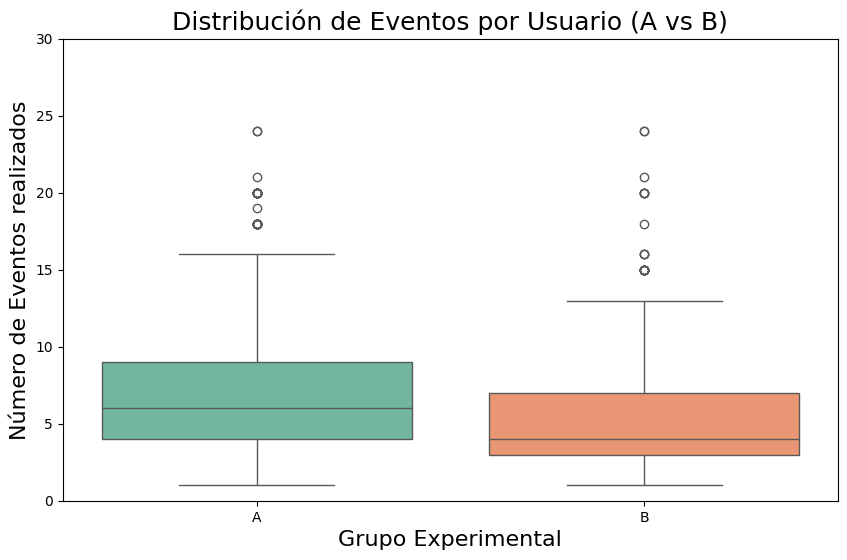

In [8]:
# Contaremos el numero de usuarios unicos y sus eventos por grupo
# distribucion = ab_data.groupby('group').agg({'user_id': 'nunique', 'event_name': 'count'})
distribucion = ab_data_filtered.groupby(['group', 'user_id'])['event_name'].count().reset_index()
distribucion_stats = distribucion.groupby('group')['event_name'].describe()
print('---------- Distribucion de Eventos por Usuario ----------\n')
display(distribucion_stats)
print('--------------------------------------------------------------\n')
# Graficamos la distribucion de eventos por usuario
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='event_name', data=distribucion, hue='group', palette="Set2", legend=False)
plt.title('Distribución de Eventos por Usuario (A vs B)', fontsize=18)
plt.ylabel('Número de Eventos realizados', fontsize=16)
plt.xlabel('Grupo Experimental', fontsize=16)
plt.ylim(0, 30)
plt.show()


### Observaciones:
#### Al analizar el grafico podemos ver que hay una diferencia en la Mediana. Vemos que el usuario típico del grupo de control A es un poco más activo que el del grupo experimental B.
#### Con respecto al rango intercuartílico vemos la caja del Grupo A es más alta; esto significa que hay una mayor variabilidad en el comportamiento de los usuarios de control.
#### Ambos grupos usuarios atípicos.

#### En conclusión vemos que el grupo no está distribuido de forma perfectamente equitativa. El Grupo A parece tener una intensidad de uso un poco mayor.

### Distribución de eventos por día.
#### Cuando sucedieron los eventos y ¿Cómo se distribuye el número de eventos entre los días?

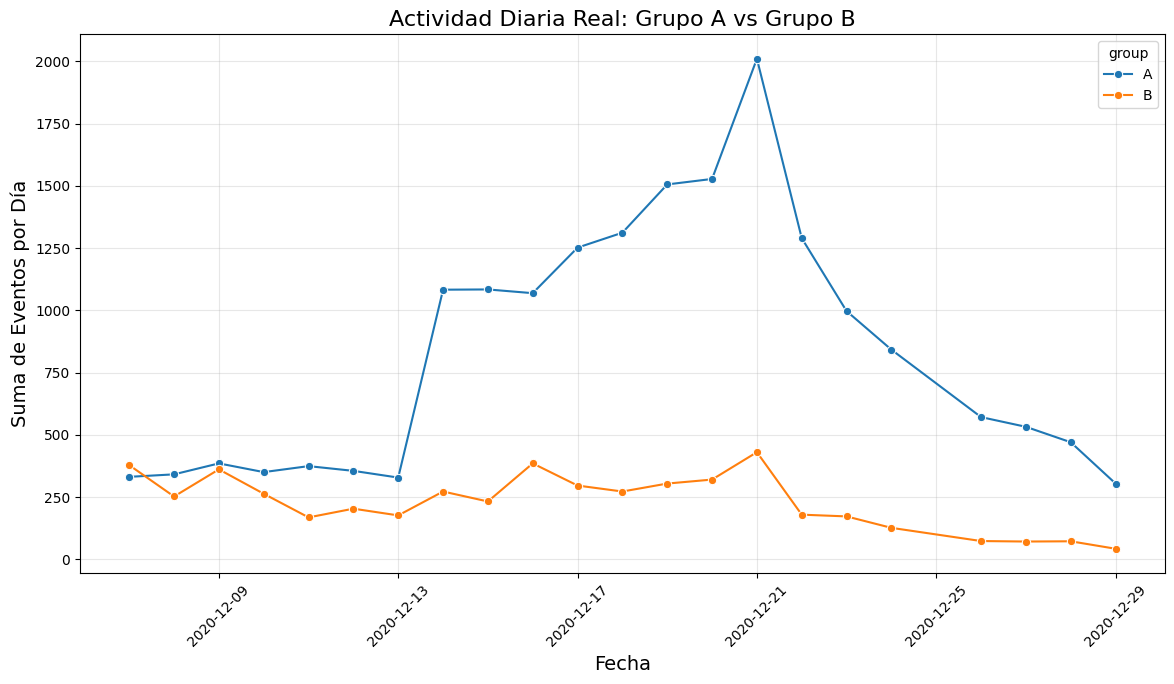

In [9]:
# Agrupamos por fecha y por grupo para contar.
ab_data_filtered['date_only'] = ab_data_filtered['event_dt'].dt.date

# Agrupamos y CONTAMOS eventos por día y por grupo
daily_counts = ab_data_filtered.groupby(['date_only', 'group']).size().reset_index(name='event_count')

# Graficamos de nuevo
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_counts, x='date_only', y='event_count', hue='group', marker='o')

plt.title('Actividad Diaria Real: Grupo A vs Grupo B', fontsize=16)
plt.ylabel('Suma de Eventos por Día', fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

plt.show()



### Observaciones:
#### Vemos un gran dominio Grupo A. Desde aproximadamente el 14 de diciembre, el Grupo A se dispara superando los 2,000 eventos diarios, mientras que el Grupo nunca logra pasar de los 500 eventos.
#### Esto nos muestra que hay una desproporción grande en el volumen de datos. El Grupo A generó aproximadamente 4 veces más tráfico de actividad que el B.
#### Vemos que la actividad máxima ocurre el 21 de diciembre, que es la fecha límite de registro de usuarios.

#### Es interesante que después de esa fecha, los dos grupos caen, pero el Grupo B cae casi a cero cerca del final del año. Esto puede indicar que el sistema de recomendaciones nuevo no logró mantener la actividad de los usuarios tras el empuje o arranque inicial.
#### También es de interés el hecho de que las 2 líneas se comporten de forma tan distinta; una crece exponencialmente y la otra se mantiene casi plana; esto  puede indicar que la asignación de usuarios no fue del todo aleatoria. Podríamos sospechar que el Grupo A recibió usuarios mucho más propensos a navegar.

## Conclusiones EDA
* ### DISTRIBUCIÓN: Los eventos NO están distribuidos equitativamente. El Grupo A es más activo de manera desproporcionada.

* ### DISTRIBUCIÓN/ACTIVIDAD/TIEMPO: La actividad se concentra entre el 14 y el 24 de diciembre. Sin embargo hay una caída drástica después de la temporada de Navidad.

* ### PECULIARIDADES: El experimento está bastante desbalanceado. Cuando comparamos un grupo gigante como el A contra uno pequeño como el B, los resultados de la conversión pueden estar sesgados a favor de A netamente por el volumen y no por calidad del sistema en realidad.

## Paso 2: Análisis del Embudo de Conversión.

### ¿Cuántos usuarios pasaron de ver un producto a comprarlo?
#### Contaremos usuarios únicos por etapa.

#### ¿Cuántos hicieron login?
#### ¿Cuántos llegaron a product_page?
#### ¿Cuántos llegaron a product_cart?
#### ¿Cuántos llegaron a purchase?

---------- Embudo de conversion ----------



,event_name,group,user_id,event_order
0,login,A,2747,login
2,product_cart,A,824,product_cart
4,product_page,A,1780,product_page
6,purchase,A,872,purchase
1,login,B,927,login
3,product_cart,B,255,product_cart
5,product_page,B,523,product_page
7,purchase,B,256,purchase



---------- Porcentaje de conversion por grupo ----------



group,A,B,conversion_rate_A (%),conversion_rate_B (%)
event_name,,,,
login,2747,927,100.00,100.00
product_page,1780,523,64.80,56.42
product_cart,824,255,30.00,27.51
purchase,872,256,31.74,27.62


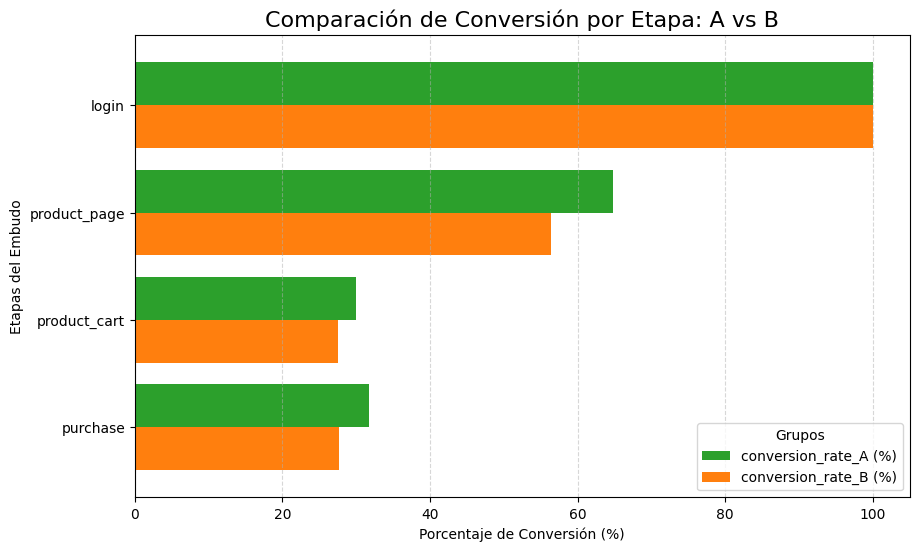

In [10]:
# Creamos una tabla para contar usuarios únicos por evento y por grupo
funnel = ab_data_filtered.groupby(['event_name', 'group'])['user_id'].nunique().reset_index()

# Ordenamos lo eventos segun los pasos del embudo.
event_order = ['login', 'product_page', 'product_cart', 'purchase']
funnel['event_order'] = pd.Categorical(funnel['event_name'], categories=event_order, ordered=True)
funnel = funnel.sort_values(['group', 'event_name'])

print('---------- Embudo de conversion ----------\n')
display(funnel)

# Calcularemos la tasa de conversión en porcentajes

# Pivotamos la tabla para tener los grupos como columnas (A y B)
funnel_pivot = funnel.pivot(index='event_name', columns='group', values='user_id')
# Reordenaremos las filas según el embudo.
funnel_pivot = funnel_pivot.reindex(['login', 'product_page', 'product_cart', 'purchase'])

# Calculamos los porcentajes de conversión para cada grupo
funnel_pivot['conversion_rate_A (%)'] = (funnel_pivot['A'] / funnel_pivot.loc['login', 'A'] * 100).round(2)
funnel_pivot['conversion_rate_B (%)'] = (funnel_pivot['B'] / funnel_pivot.loc['login', 'B'] * 100).round(2)

print('\n---------- Porcentaje de conversion por grupo ----------\n')
display(funnel_pivot)

# Seleccionamos las dos columnas de porcentaje y graficamos
funnel_pivot[['conversion_rate_A (%)', 'conversion_rate_B (%)']].plot(
    kind='barh',                   # Barras Horizontales
    figsize=(10, 6),
    color=['#2ca02c', '#ff7f0e'],
    width=0.8
)

plt.title('Comparación de Conversión por Etapa: A vs B', fontsize=16)
plt.xlabel('Porcentaje de Conversión (%)')
plt.ylabel('Etapas del Embudo')
plt.gca().invert_yaxis()           # Invertimos el eje para que Login quede arriba
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend(title='Grupos')

plt.show()

### Observaciones/Conclusiónes Análisis del Embudo
### ¿Qué podemos decir sobre los resultados de la prueba A/B?

#### El Grupo B tiene una conversión inferior en todas las etapas. Contrario a la hipótesis inicial que esperaba un aumento del 10%, el sistema de recomendaciones nuevo, el Grupo B muestra, un rendimiento menor al sistema actual Grupo A.
#### La caída es más fuerte en la página de producto; aquí el Grupo A su taza de conversión es de 64.8% mientras que el B solo 56.4%.

#### En la compra final: El Grupo A termina con un 31.7% frente a un 27.6% del Grupo B. En vez de ganar un 10%, pierde mas bien un 4.1%.

#### ¿Por qué falló el Grupo B?
#### Basado en todo lo que hemos visto podemos mencionar 2 factores clave:

* #### Muestra mas pequeña: El Grupo B tiene 927 usuarios con respecto a los 2,747 del A. Así es más difícil que los números se estabilicen.

* #### Posible menor interés inicial: El Grupo B pierde mucha gente después del Login; solo el 56% ve un producto. Quizás las recomendaciones nuevas no son relevantes para el usuario y lo ahuyentan rápido o no lo incentivan a seguir.

#### Un detalle interesante es que el embudo no es estrictamente lineal. Existe un 'atajo' donde los usuarios compran sin registrar el evento de carrito. Según investigamos, en e-commerce esto es posible por dos razones:

#### Compra en un clic: Como un "Buy It Now". Seguramente el sitio permite comprar directo desde la página del producto sin ir al carrito.

#### Pago rápido: Similar al boton de compra rápida. Algunos e-commerce permiten que el usuario use metodos de pago rápido como Apple Pay/Google Pay que también salta el paso del carrito.



## Paso 3: Prueba Z para comprobar la diferencia estadística entre las proporciones.

### Hipótesis Nula ($H_0$): "No hay diferencia real". Si el Grupo A es mejor que el B, es por puro azar.
### Hipótesis Alternativa ($H_1$): "Hay una diferencia significativa". El cambio sí afectó el comportamiento.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Definiremos una función para pruebas "múltiples"
def realizar_prueba_z(purchases_a, total_a, purchases_b, total_b, event):
    alpha = 0.05 # Nivel de significancia estándar

    counts = [purchases_a, purchases_b]
    nobs = [total_a, total_b]

    # Calculamos Z y P-value
    z_stat, p_value = proportions_ztest(counts, nobs)

    print(f"ETAPA: {event.upper()}")
    print(f"P-Value: {p_value:.5f}")

    if p_value < alpha:
        print(" RESULTADO: La Diferencia es ESTADÍSTICAMENTE SIGNIFICATIVA.")
        print(" Conclusión: El cambio en esta etapa NO es fruto del azar.")
    else:
        print(" RESULTADO: Diferencia NO significativa.")
        print(" Conclusión: La diferencia observada podría deberse a la casualidad.")
    print("-" * 50)

# 2. Automatización: Recorremos las etapas de tu tabla funnel_pivot
# Extraemos los totales (el valor de 'login' para cada grupo)
total_a = funnel_pivot.loc['login', 'A']
total_b = funnel_pivot.loc['login', 'B']

print(f"Base para la comparación: Grupo A = {total_a} usuarios, Grupo B = {total_b} usuarios\n")

# Iteramos sobre las etapas del embudo (excluyendo login)
for event in ['product_page', 'product_cart', 'purchase']:
    exitos_a = funnel_pivot.loc[event, 'A']
    exitos_b = funnel_pivot.loc[event, 'B']

    # Llamamos a la función
    realizar_prueba_z(exitos_a, total_a, exitos_b, total_b, event)

Base para la comparación: Grupo A = 2747 usuarios, Grupo B = 927 usuarios

ETAPA: PRODUCT_PAGE
P-Value: 0.00001
 RESULTADO: La Diferencia es ESTADÍSTICAMENTE SIGNIFICATIVA.
 Conclusión: El cambio en esta etapa NO es fruto del azar.
--------------------------------------------------
ETAPA: PRODUCT_CART
P-Value: 0.15034
 RESULTADO: Diferencia NO significativa.
 Conclusión: La diferencia observada podría deberse a la casualidad.
--------------------------------------------------
ETAPA: PURCHASE
P-Value: 0.01847
 RESULTADO: La Diferencia es ESTADÍSTICAMENTE SIGNIFICATIVA.
 Conclusión: El cambio en esta etapa NO es fruto del azar.
--------------------------------------------------


### Observaciones por etapa:
#### PRODUCT_PAGE: La caída en la conversión que vimos en el gráfico del 64% en A al 56% en B es totalmente real. El nuevo sistema de recomendaciones está fallando en su primer paso. En lugar de ayudar a que la gente vea productos, parece que los está alejando o no les está ofreciendo lo que buscan.

#### PRODUCT_CART: estadísticamente no podemos asegurar que haya una diferencia. En este paso específico, el azar todavía puede jugar un papel y influir. Esto pasa generalmente cuando el tamaño de la muestra es pequeño como B que tiene menos usuarios.

#### PURCHASE: La diferencia es significativa. El Grupo B convierte menos en ventas reales 27.6% vs 31.7% y según la prueba Z; esta pérdida no es casualidad.

## Paso 4: Conclusiones y Recomendaciones Finales

 ### 1. Resultado del Experimento: El nuevo sistema de recomendaciones no logró alcanzar el objetivo esperado de un aumento del 10% en la conversión. Mas bien, los datos muestran una baja en la experiencia del usuario. Las pruebas Z-test confirmaron con un nivel de confianza del 95% que la caída en las etapas de product_page y purchase es real y no producto del azar.

 ### 2. Resultados del Análisis de Embudo: La mayor pérdida de usuarios ocurre después del inicio de sesión. El nuevo sistema no logra motivar a los usuarios del Grupo B a explorar productos con la misma eficacia que el sistema actual. Encontramos un flujo no Lineal; detectamos que muchos usuarios realizan las compras directas sin pasar por al carrito, esto es una característica del diseño de la plataforma que debe considerarse en futuros análisis.

 ### 3. Problemas detectados: Identificamos tres factores externos que pudieron sesgar los resultados:
 * #### Desbalance de Grupos: El Grupo A fue mucho más grande que el B, lo que afecta la estabilidad de las comparaciones al final.
 * #### Interferencia por la estación: El test se realizó durante las fiestas de diciembre, probablemente coincidiendo con campañas de marketing que alteran el comportamiento natural de las compras en los negocios.
 * #### Actividad Inconsistente: El análisis de actividad diaria mostró picos bien extremos en el grupo de control que no se vieron para nada en el grupo experimental.

### Recomendaciónes Estratégica para la emrpesa:
#### No vemos recomendable implementar el nuevo sistema de recomendaciones. La razón es que el riesgo de pérdida de ingresos es alto. Se sugiere mas bien hacer una revisión técnica del algoritmo de recomendaciónes y planificar un nuevo Test A/B en una temporada de tráfico de ventas estable asegurando una mejor división de usuarios 50/50 para ambos grupos desde el primer día.

# Nota para el revisor!!
### Adjunto las instrucciones que tenia el proyecto al momento de elaborarlo para evitar confusiones o inconvenientes como sucedió con la primera parte del proyecto anterior donde se solicitaba una descomposición.

### Instrucciones:
Proyecto de pruebas A/B
Ejercicio
Has recibido una tarea analítica de una tienda en línea internacional. Tus predecesores no consiguieron completarla: lanzaron una prueba A/B y luego abandonaron (para iniciar una granja de sandías en Brasil). Solo dejaron las especificaciones técnicas y los resultados de las pruebas.

Descripción técnica
Nombre de la prueba: recommender_system_test
Grupos: А (control), B (nuevo embudo de pago)
Fecha de lanzamiento: 2020-12-07
Fecha en la que dejaron de aceptar nuevos usuarios: 2020-12-21
Fecha de finalización: 2021-01-01
Audiencia: 15% de los nuevos usuarios de la región de la UE
Propósito de la prueba: probar cambios relacionados con la introducción de un sistema de recomendaciones mejorado
Resultado esperado: dentro de los 14 días posteriores a la inscripción, los usuarios mostrarán una mejor conversión en vistas de la página del producto (el evento product_page), instancias de agregar artículos al carrito de compras (product_cart) y compras (purchase). En cada etapa del embudo product_page → product_cart → purchase, habrá al menos un 10% de aumento.
Número previsto de participantes de la prueba: 6 000
Descarga los datos de la prueba, comprueba si se ha realizado correctamente y analiza los resultados.

Descripción de los datos
Descarga los datasets de Notion.

Para acceder a los datasets de la plataforma, agrega /datasets/ al principio de la ruta del archivo (por ejemplo, /datasets/ab_project_marketing_events_us.csv).

ab_project_marketing_events_us.csv — el calendario de eventos de marketing para 2020
final_ab_new_users_upd_us.csv — todos los usuarios que se registraron en la tienda en línea desde el 7 hasta el 21 de diciembre de 2020
final_ab_events_upd_us.csv — todos los eventos de los nuevos usuarios en el período comprendido entre el 7 de diciembre de 2020 y el 1 de enero de 2021
final_ab_participants_upd_us.csv — tabla con los datos de los participantes de la prueba
Estructura ab_project__marketing_events_us.csv:

name — el nombre del evento de marketing
regions — regiones donde se llevará a cabo la campaña publicitaria
start_dt — fecha de inicio de la campaña
finish_dt — fecha de finalización de la campaña
Estructura final_ab_new_users_upd_us.csv:

user_id
first_date — fecha de inscripción
region
device — dispositivo utilizado para la inscripción
Estructura final_ab_events_upd_us.csv:

user_id
event_dt — fecha y hora del evento
event_name — nombre del tipo de evento
details — datos adicionales sobre el evento (por ejemplo, el pedido total en USD para los eventos purchase)
Estructura final_ab_participants_upd_us.csv:

user_id
ab_test — nombre de la prueba
group — el grupo de prueba al que pertenecía el usuario
Instrucciones para completar la tarea
Describe los objetivos del estudio.
Explora los datos:
¿Es necesario convertir los tipos?
¿Hay valores ausentes o duplicados? Si es así, ¿cómo los caracterizarías?
Lleva a cabo el análisis exploratorio de datos:
Estudia la conversión en las diferentes etapas del embudo.
¿El número de eventos por usuario está distribuido equitativamente entre las muestras?
¿Hay usuarios que están presentes en ambas muestras?
¿Cómo se distribuye el número de eventos entre los días?
¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?
Evaluar los resultados de la prueba A/B:
¿Qué puedes decir sobre los resultados de la prueba A/B?
Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones.
Describe tus conclusiones con respecto a la etapa EDA y los resultados de la prueba A/B.